In [1]:
import heapq

# Define task parameters
WCET = {'T1': 200, 'T2': 100, 'T3': 100, 'T4': 200}
DEADLINE = {'T1': 600, 'T2': 300, 'T3': 700, 'T4': 900}
PERIOD = DEADLINE.copy()  # assume period = deadline for simplicity

# Initialize task instances
class Task:
    def __init__(self, name, release_time, deadline):
        self.name = name
        self.release_time = release_time
        self.deadline = deadline
        self.remaining_time = WCET[name]

    def __lt__(self, other):
        return self.deadline < other.deadline

# Scheduler simulation
time = 0
simulation_end = 2000
ready_queue = []
task_log = []

# To keep track of next release time
next_release = {name: 0 for name in WCET}

print("EDF Simulation Start")

while time < simulation_end:
    # Release new task instances
    for task_name in WCET:
        if time == next_release[task_name]:
            task = Task(task_name, time, time + DEADLINE[task_name])
            heapq.heappush(ready_queue, task)
            next_release[task_name] += PERIOD[task_name]

    if ready_queue:
        current_task = heapq.heappop(ready_queue)
        execution_time = min(current_task.remaining_time, 1)
        task_log.append((time, time + execution_time, current_task.name))

        current_task.remaining_time -= execution_time
        if current_task.remaining_time > 0:
            heapq.heappush(ready_queue, current_task)

    time += 1

print("EDF Simulation End")

# Print result
for start, end, task in task_log:
    print(f"{task} ran from {start} to {end}")


EDF Simulation Start
EDF Simulation End
T2 ran from 0 to 1
T2 ran from 1 to 2
T2 ran from 2 to 3
T2 ran from 3 to 4
T2 ran from 4 to 5
T2 ran from 5 to 6
T2 ran from 6 to 7
T2 ran from 7 to 8
T2 ran from 8 to 9
T2 ran from 9 to 10
T2 ran from 10 to 11
T2 ran from 11 to 12
T2 ran from 12 to 13
T2 ran from 13 to 14
T2 ran from 14 to 15
T2 ran from 15 to 16
T2 ran from 16 to 17
T2 ran from 17 to 18
T2 ran from 18 to 19
T2 ran from 19 to 20
T2 ran from 20 to 21
T2 ran from 21 to 22
T2 ran from 22 to 23
T2 ran from 23 to 24
T2 ran from 24 to 25
T2 ran from 25 to 26
T2 ran from 26 to 27
T2 ran from 27 to 28
T2 ran from 28 to 29
T2 ran from 29 to 30
T2 ran from 30 to 31
T2 ran from 31 to 32
T2 ran from 32 to 33
T2 ran from 33 to 34
T2 ran from 34 to 35
T2 ran from 35 to 36
T2 ran from 36 to 37
T2 ran from 37 to 38
T2 ran from 38 to 39
T2 ran from 39 to 40
T2 ran from 40 to 41
T2 ran from 41 to 42
T2 ran from 42 to 43
T2 ran from 43 to 44
T2 ran from 44 to 45
T2 ran from 45 to 46
T2 ran from 4

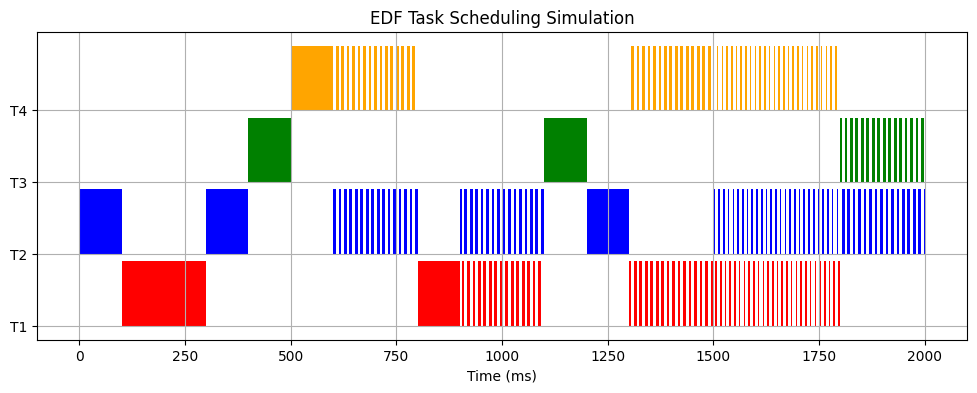

In [2]:
import matplotlib.pyplot as plt

colors = {'T1': 'red', 'T2': 'blue', 'T3': 'green', 'T4': 'orange'}

fig, ax = plt.subplots(figsize=(12, 4))
for start, end, task in task_log:
    ax.broken_barh([(start, end - start)], (10 * int(task[1]), 9), facecolors=colors[task])

ax.set_xlabel("Time (ms)")
ax.set_yticks([10, 20, 30, 40])
ax.set_yticklabels(['T1', 'T2', 'T3', 'T4'])
ax.grid(True)
plt.title("EDF Task Scheduling Simulation")
plt.show()
